<a href="https://colab.research.google.com/github/DinhKhoi038/FoodReconization/blob/main/Florababy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#khaibao
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/BVN/Flora

/content/gdrive/MyDrive/BT AI/Hoa


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/BVN/Flora/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 176 images belonging to 3 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/gdrive/MyDrive/BVN/Flora/Input',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 60 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'hoa cuc': 0, 'hoa hong': 1, 'hoa tulip': 2}

In [ ]:
validation.class_indices

{'hoa cuc': 0, 'hoa hong': 1, 'hoa tulip': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
6/6 [==============================] - 45s 8s/step - loss: 1.2411 - accuracy: 0.3693 - val_loss: 1.1472 - val_accuracy: 0.3333
Epoch 2/50
6/6 [==============================] - 29s 5s/step - loss: 1.0536 - accuracy: 0.5000 - val_loss: 1.0805 - val_accuracy: 0.4667
Epoch 3/50
6/6 [==============================] - 27s 4s/step - loss: 0.9107 - accuracy: 0.4886 - val_loss: 0.9940 - val_accuracy: 0.4833
Epoch 4/50
6/6 [==============================] - 27s 4s/step - loss: 0.8799 - accuracy: 0.5909 - val_loss: 0.8087 - val_accuracy: 0.6167
Epoch 5/50
6/6 [==============================] - 27s 4s/step - loss: 0.7804 - accuracy: 0.6080 - val_loss: 0.8590 - val_accuracy: 0.5667
Epoch 6/50
6/6 [==============================] - 27s 4s/step - loss: 0.8408 - accuracy: 0.6307 - val_loss: 0.8011 - val_accuracy: 0.5833
Epoch 7/50
6/6 [==============================] - 27s 4s/step - loss: 0.7540 - accuracy: 0.6818 - val_loss: 0.6811 - val_accuracy: 0.7167
Epoch 8/50
6/6 [==================

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.02817133069038391
Train Accuracy 0.9886363744735718


In [ ]:
model.save("Flowers.h5")

In [ ]:
model_CNN=load_model('Flowers.h5')

1/1 [==============================] - 0s 221ms/step
hoa cuc


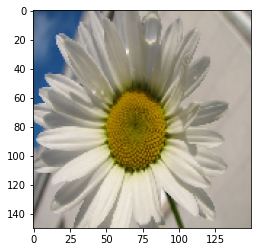

1/1 [==============================] - 0s 56ms/step
hoa cuc


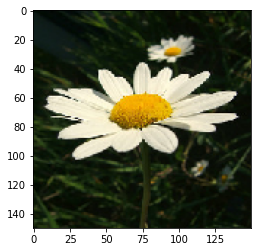

1/1 [==============================] - 0s 137ms/step
hoa hong


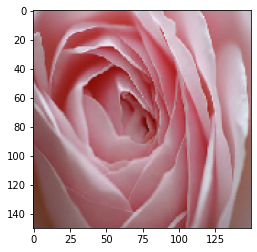

1/1 [==============================] - 0s 54ms/step
hoa hong


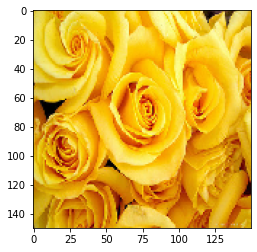

1/1 [==============================] - 0s 53ms/step
hoa tulip


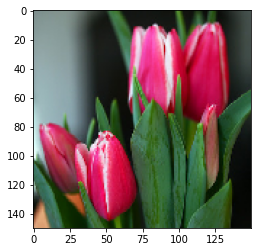

1/1 [==============================] - 0s 52ms/step
hoa tulip


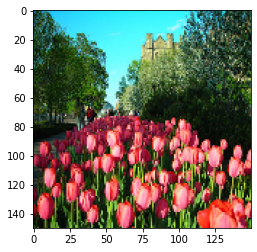

In [ ]:
test="/content/gdrive/MyDrive/BVN/Flora/Test/Testing1/"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='hoa cuc'
  if round(result[0][1])==1:
    prediction='hoa hong'
  if round(result[0][2])==1:
    prediction='hoa tulip'
  print(prediction)
  plt.show()